<a href="https://colab.research.google.com/github/innovativenexusbd/AgroAI/blob/main/weather_pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing**

In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Define and Split the Data**

In [15]:
X = weather_df[['Year', 'Month']]
y = weather_df[['Avg_Temperature', 'Avg_Rainfall', 'Avg_Humidity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train the Random Forest Model**

In [16]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Predicting Weather Pattern**

In [19]:
next_year = 2024
months = list(range(1, 13))
predictions = []
for month in months:
    prediction = rf.predict([[next_year, month]])
    predictions.append([next_year, month] + prediction[0].tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

**Saving The Prediction Data**

In [20]:
predictions_df = pd.DataFrame(predictions, columns=['Year', 'Month', 'Avg_Temperature', 'Avg_Rainfall', 'Avg_Humidity'])
predictions_df.to_csv('weather_predictions_2024.csv', index=False)
print("Weather Predictions for 2024:")
print(predictions_df)


Weather Predictions for 2024:
    Year  Month  Avg_Temperature  Avg_Rainfall  Avg_Humidity
0   2024      1        21.706525     54.710311     64.556229
1   2024      2        23.169096     44.365877     72.018916
2   2024      3        24.706643     32.763214     78.613868
3   2024      4        25.138067     44.244986     81.741169
4   2024      5        27.084145     46.939717     81.977892
5   2024      6        27.881499    104.465590     83.832596
6   2024      7        27.700574    135.793991     69.996009
7   2024      8        26.354655    153.821285     62.453087
8   2024      9        24.099387    175.546704     58.389176
9   2024     10        24.719698    152.453807     59.156955
10  2024     11        22.060228    122.374790     61.716400
11  2024     12        21.957516     87.908709     66.145576


**Visualization**

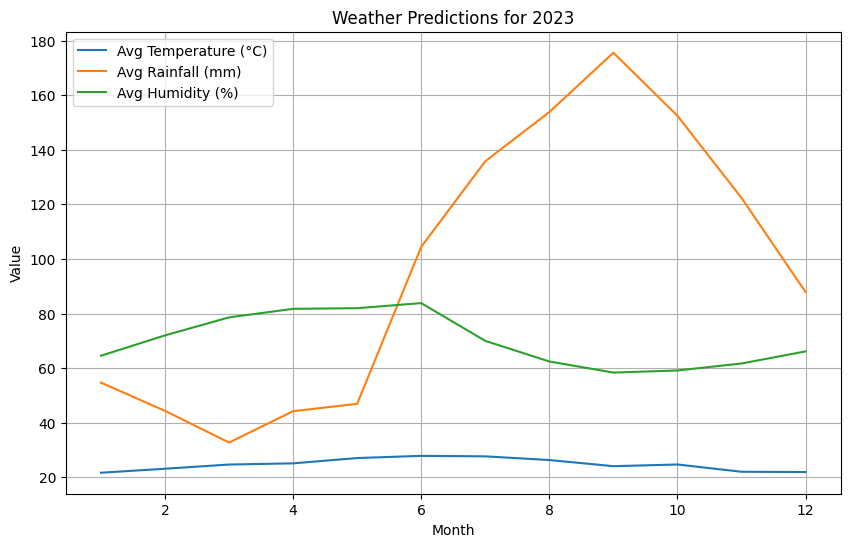

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(predictions_df['Month'], predictions_df['Avg_Temperature'], label='Avg Temperature (°C)')
plt.plot(predictions_df['Month'], predictions_df['Avg_Rainfall'], label='Avg Rainfall (mm)')
plt.plot(predictions_df['Month'], predictions_df['Avg_Humidity'], label='Avg Humidity (%)')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Weather Predictions for 2023')
plt.legend()
plt.grid(True)
plt.show()